<a href="https://colab.research.google.com/github/iwymega/a185-Pengembangan-ml/blob/master/Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wayanmegantara","key":"1097429e3b89f79a6baa9e98e50e8fb9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d madisona/translated-animals10

 98% 572M/586M [00:02<00:00, 292MB/s]
100% 586M/586M [00:02<00:00, 270MB/s]


In [ ]:
# unzip
!mkdir animals
!unzip -qq translated-animals10.zip -d animals
!ls animals

animals10


In [ ]:
!ls animals/animals10/raw-img/

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [ ]:
# Import modul os untuk berinteraksi dengan sistem operasi
import os

# Buat variabel animals dan set nilainya ke path direktori gambar
animals = os.path.join('/content/animals/animals10/raw-img/')

# Panggil fungsi os.listdir() untuk mendapatkan daftar file dan subdirektori di dalam direktori animals
# dan cetak daftar tersebut ke layar
print(os.listdir(animals))


['dog', 'horse', 'sheep', 'squirrel', 'spider', 'cow', 'cat', 'butterfly', 'elephant', 'chicken']


In [ ]:
# Import modul shutil untuk menghapus direktori
import shutil

# Daftar hewan yang akan dihapus direktorinya
ignore_animals = ['squirrel', 'cat', 'butterfly', 'sheep', 'cow', 'horse']

# Loop untuk setiap hewan di daftar ignore_animals
for x in ignore_animals:
  # Buat path lengkap ke direktori hewan tersebut
  path = os.path.join(animals, x)

  # Hapus direktori beserta semua isinya
  shutil.rmtree(path)


In [ ]:
# Buat variabel list_animals untuk menyimpan daftar hewan
# list_animals akan berisi nama-nama file dan subdirektori di dalam direktori animals
list_animals = os.listdir(animals)

# Cetak daftar list_animals ke layar
print(list_animals)

['dog', 'spider', 'elephant', 'chicken']


In [ ]:
# Import modul untuk bekerja dengan gambar
from PIL import Image

# Buat variabel untuk menyimpan jumlah total gambar
total = 0

# Loop untuk setiap hewan di list_animals
for x in list_animals:
  # Buat path lengkap ke direktori hewan tersebut
  dir = os.path.join(animals, x)

  # Hitung jumlah file di dalam direktori hewan tersebut
  y = len(os.listdir(dir))

  # Cetak nama hewan dan jumlah filenya
  print(x + ":", y)

  # Tambahkan jumlah file ke total
  total = total + y

  # Cetak ukuran 4 gambar pertama di direktori tersebut
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)  # Buka gambar menggunakan PIL
    print("-", img.size)  # Cetak ukuran gambar

  # Cetak garis pemisah untuk membedakan output setiap hewan
  print("---------------")

# Cetak jumlah total gambar di semua direktori
print("\nTotal :", total)

dog: 4863
- (300, 208)
- (300, 225)
- (300, 225)
- (225, 300)
---------------
spider: 4821
- (300, 225)
- (201, 300)
- (246, 300)
- (300, 201)
---------------
elephant: 1446
- (300, 200)
- (300, 188)
- (300, 188)
- (200, 300)
---------------
chicken: 3098
- (300, 290)
- (300, 225)
- (216, 288)
- (300, 202)
---------------

Total : 14228


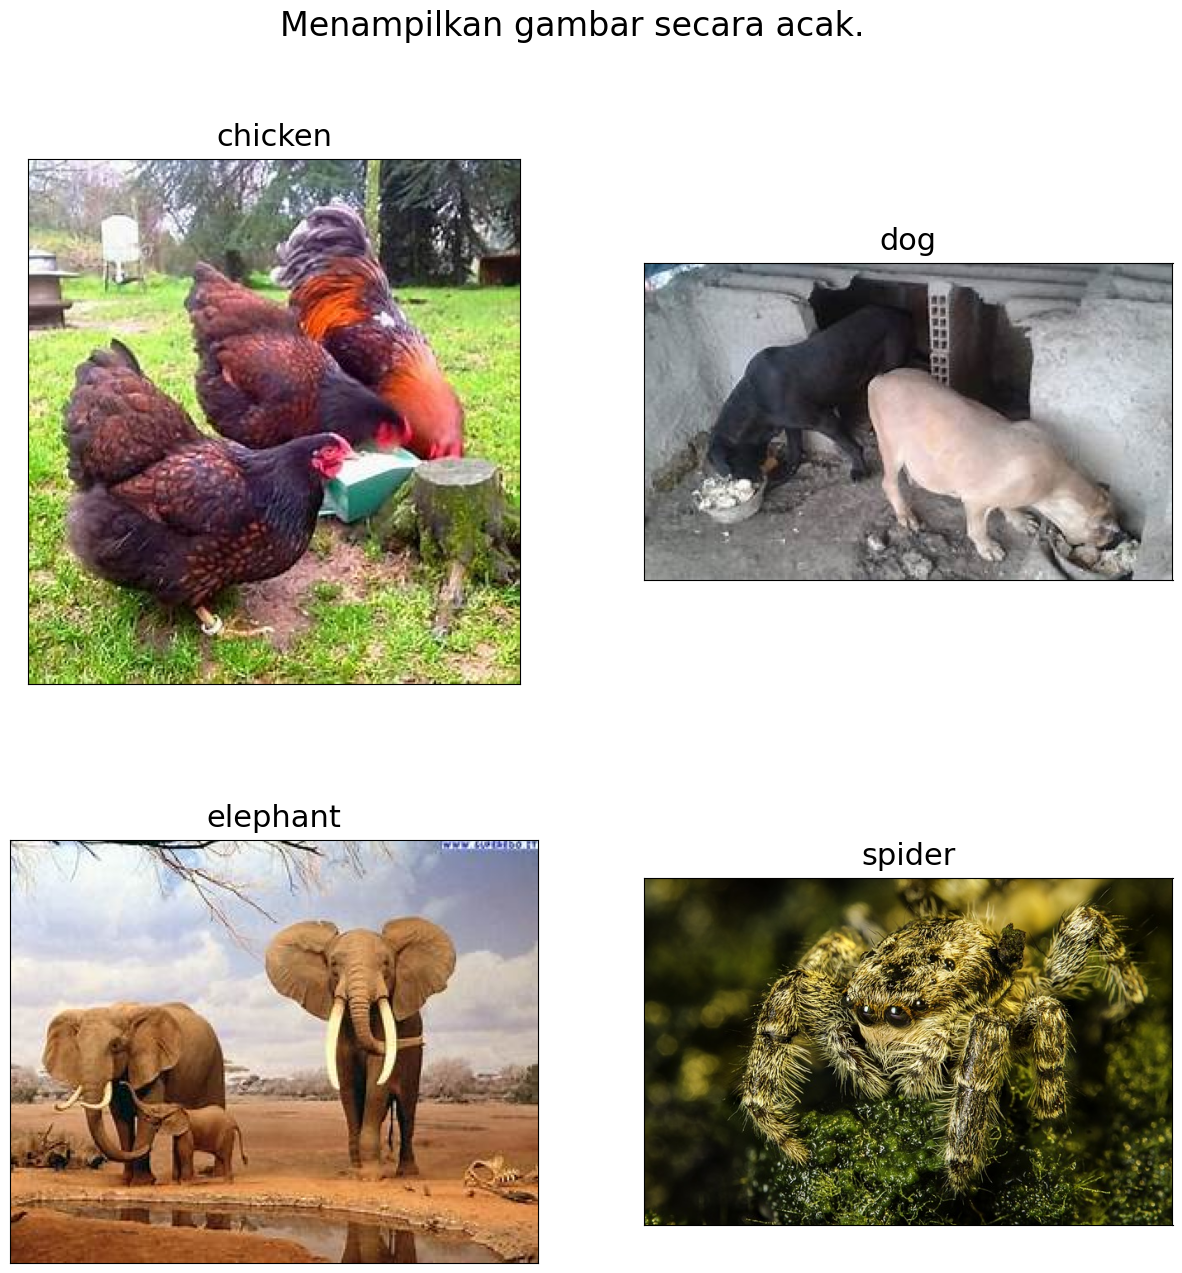

In [ ]:
import numpy as np  # Import NumPy untuk operasi matematika
import matplotlib.pyplot as plt  # Import Matplotlib untuk visualisasi

# Buat figure dan subplot untuk menampilkan 4 gambar
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Menampilkan gambar secara acak.", fontsize=24)  # Set judul utama figure

animals_sorted = sorted(list_animals)  # Urutkan daftar hewan
animals_id = 0  # Inisiasi indeks untuk memilih hewan

# Loop untuk menampilkan 4 gambar secara acak
for i in range(2):
  for j in range(2):
    try:
      # Dapatkan nama hewan berikutnya dari daftar hewan yang diurutkan
      animals_selected = animals_sorted[animals_id]
      animals_id += 1
    except:
      break  # Hentikan loop jika tidak ada hewan lagi

    # Abaikan direktori ".TEMP" jika ada
    if animals_selected == '.TEMP':
      continue

    # Dapatkan daftar file gambar dari direktori hewan tersebut
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))

    # Pilih gambar secara acak dari daftar gambar
    animals_selected_random = np.random.choice(animals_selected_images)

    # Baca gambar menggunakan Matplotlib
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))

    # Tampilkan gambar pada subplot
    ax[i][j].imshow(img)

    # Set judul subplot dengan nama hewan
    ax[i][j].set_title(animals_selected, pad=10, fontsize=22)

# Sembunyikan sumbu x dan y untuk tampilan yang lebih bersih
plt.setp(ax, xticks=[], yticks=[])

# Tampilkan gambar
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import modul untuk augmentasi gambar

# Buat generator untuk augmentasi data latih
train_datagen = ImageDataGenerator(
    rotation_range=40,  # Rotasi gambar secara acak hingga 40 derajat
    width_shift_range=0.2,  # Geser gambar secara horizontal hingga 20% lebarnya
    height_shift_range=0.2,  # Geser gambar secara vertikal hingga 20% tingginya
    rescale=1/255,  # Normalisasi nilai piksel menjadi antara 0 dan 1
    shear_range=0.2,  # Miringkan gambar secara acak hingga 20%
    zoom_range=0.2,  # Zoom gambar secara acak hingga 20%
    horizontal_flip=True,  # Cekung gambar secara horizontal secara acak
    fill_mode='nearest',  # Cara mengisi piksel kosong setelah transformasi
    validation_split=0.2  # Gunakan 20% dari data untuk validasi
)

In [ ]:
# Tentukan ukuran batch untuk proses pelatihan
batch_size = 256

# Buat generator untuk data latih
data_train = train_datagen.flow_from_directory(
    animals,  # Path direktori yang berisi gambar (terorganisir dalam subdirektori sesuai kelas)
    target_size=(150, 150),  # Ukuran gambar yang diinginkan setelah resize
    batch_size=batch_size,  # Jumlah gambar dalam setiap batch
    class_mode='categorical',  # Jenis label (kategorikal untuk multi-class)
    subset='training'  # Gunakan subset latih berdasarkan `validation_split` dari generator
)

# Buat generator untuk data validasi
data_val = train_datagen.flow_from_directory(
    animals,  # Path direktori yang sama
    target_size=(150, 150),  # Ukuran gambar yang sama
    batch_size=batch_size,  # Ukuran batch yang sama
    class_mode='categorical',  # Jenis label yang sama
    subset='validation'  # Gunakan subset validasi berdasarkan `validation_split`
)


Found 11384 images belonging to 4 classes.
Found 2844 images belonging to 4 classes.


In [ ]:
import tensorflow as tf  # Import TensorFlow

# Pastikan GPU tersedia sebelum menggunakan
tf.device('/device:GPU:0')

# Buat model sekuensial (berurutan)
model = tf.keras.models.Sequential([
    # Layer konvolusi pertama:
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Layer pooling pertama:
    tf.keras.layers.MaxPooling2D(2, 2),
    # Layer konvolusi kedua:
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Layer pooling kedua:
    tf.keras.layers.MaxPooling2D(2, 2),
    # Layer konvolusi ketiga:
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Layer pooling ketiga:
    tf.keras.layers.MaxPooling2D(2, 2),
    # Layer konvolusi keempat:
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Layer pooling keempat:
    tf.keras.layers.MaxPooling2D(2, 2),
    # Memipihkan hasil dari layer konvolusi:
    tf.keras.layers.Flatten(),
    # Layer dropout untuk mencegah overfitting:
    tf.keras.layers.Dropout(0.5),
    # Layer fully connected pertama:
    tf.keras.layers.Dense(512, activation='relu'),
    # Layer output untuk 4 kelas:
    tf.keras.layers.Dense(4, activation='softmax')
])

# Kompilasi model untuk pelatihan
model.compile(optimizer='adam',  # Optimizer Adam untuk update parameter model
              loss='categorical_crossentropy',  # Loss function untuk klasifikasi multi-class
              metrics=['accuracy'])  # Metrik untuk mengevaluasi performa model

# Cetak ringkasan arsitektur model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):  # Buat kelas callback custom
    def on_epoch_end(self, epoch, logs={}):  # Metode yang dipanggil di akhir setiap epoch
        if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
            print("\nAkurasi di atas 92%, hentikan pelatihan!")
            self.model.stop_training = True  # Hentikan pelatihan model

callbacks = myCallback()  # Buat instance callback untuk digunakan


In [17]:
history = model.fit(
    data_train,  # Data latih yang dihasilkan oleh generator
    epochs=40,  # Latih model selama 40 epoch
    steps_per_epoch=data_train.samples // batch_size,  # Jumlah batch per epoch
    validation_data=data_val,  # Data validasi
    validation_steps=data_val.samples // batch_size,  # Jumlah batch data validasi
    verbose=1,  # Tampilkan progress bar dan hasil setiap epoch
    callbacks=[callbacks]  # Gunakan callback yang telah dibuat
)


Epoch 1/40
44/44 [==============================] - 552s 13s/step - loss: 1.3124 - accuracy: 0.3686 - val_loss: 1.2534 - val_accuracy: 0.4379
Epoch 2/40
44/44 [==============================] - 556s 13s/step - loss: 1.1916 - accuracy: 0.4698 - val_loss: 1.1898 - val_accuracy: 0.4915
Epoch 3/40
44/44 [==============================] - 596s 14s/step - loss: 1.0416 - accuracy: 0.5663 - val_loss: 0.9093 - val_accuracy: 0.6293
Epoch 4/40
44/44 [==============================] - 559s 13s/step - loss: 0.8939 - accuracy: 0.6415 - val_loss: 0.8164 - val_accuracy: 0.6811
Epoch 5/40
44/44 [==============================] - 598s 14s/step - loss: 0.7923 - accuracy: 0.6946 - val_loss: 0.7890 - val_accuracy: 0.6822
Epoch 6/40
44/44 [==============================] - 570s 13s/step - loss: 0.7083 - accuracy: 0.7310 - val_loss: 0.7032 - val_accuracy: 0.7209
Epoch 7/40
44/44 [==============================] - 567s 13s/step - loss: 0.6638 - accuracy: 0.7470 - val_loss: 0.6224 - val_accuracy: 0.7745
Epoch 

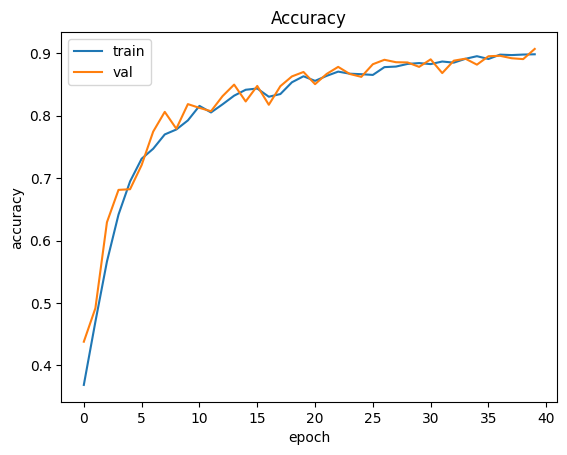

In [18]:
# Plot akurasi pada training set
plt.plot(history.history['accuracy'])

# Plot akurasi pada validation set
plt.plot(history.history['val_accuracy'])

# Set judul plot
plt.title('Accuracy')

# Set label sumbu y
plt.ylabel('accuracy')

# Set label sumbu x
plt.xlabel('epoch')

# Tampilkan legenda untuk membedakan kurva training dan validation
plt.legend(['train', 'val'], loc='upper left')

# Tampilkan plot secara visual
plt.show()


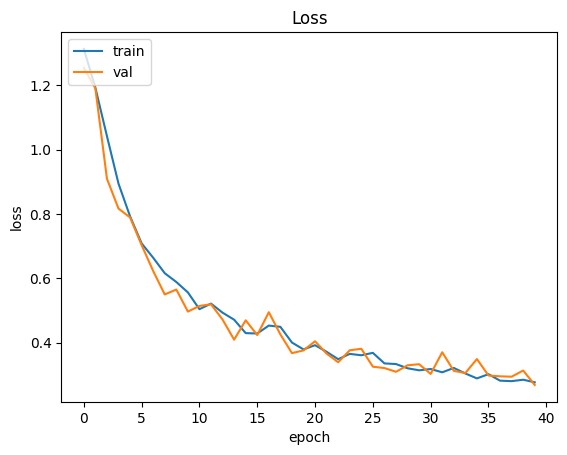

In [19]:
# Plot loss pada training set
plt.plot(history.history['loss'])

# Plot loss pada validation set
plt.plot(history.history['val_loss'])

# Set judul plot
plt.title('Loss')

# Set label sumbu y
plt.ylabel('loss')

# Set label sumbu x
plt.xlabel('epoch')

# Tampilkan legenda untuk membedakan kurva training dan validation
plt.legend(['train', 'val'], loc='upper left')

# Tampilkan plot secara visual
plt.show()


In [20]:
# Buat converter dari model Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Konversi model Keras ke model TensorFlow Lite
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)


In [21]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900760 Jan 15 16:47 model.tflite
